In [1]:
import pandas as pd
import json

In [2]:
data = pd.read_csv('res_Oct14.csv').reset_index()
data = data[((data['distant'] == 'without_distant') & (data['added_gold'] == 0.0)) == False]
data

,index,framework,train_dataset,added_gold,distant,BDE,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall
0,0,supervised,conll03,0.10,without_distant,supervised,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.865400,0.907011,0.827440,0.878221,0.925148,0.835824,0.875000,0.927039,0.828493
1,1,supervised,conll03,0.05,without_distant,supervised,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.289457,0.835023,0.175072,0.293054,0.850829,0.177011,0.233552,0.797657,0.136804
2,2,supervised,conll03,0.40,without_distant,supervised,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.906094,0.898688,0.913623,0.920668,0.917602,0.923755,0.935633,0.930144,0.941187
3,3,supervised,conll03,0.50,without_distant,supervised,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.901090,0.892214,0.910145,0.916611,0.912005,0.921264,0.927337,0.918938,0.935890
4,4,supervised,conll03,0.05,without_distant,supervised,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.628135,0.920522,0.476715,0.629100,0.927904,0.475862,0.618142,0.905534,0.469224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,bond,conll03,0.15,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.785860,0.833731,0.743188,0.798290,0.851498,0.751341,0.811756,0.855985,0.771872
361,361,bond,conll03,0.20,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.864881,0.881904,0.848502,0.876091,0.897848,0.855364,0.885709,0.901456,0.870502
362,362,bond,conll03,0.30,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.886242,0.895776,0.876908,0.898833,0.913043,0.885057,0.905463,0.911836,0.899178
363,363,bond,conll03,0.40,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.915382,0.913094,0.917681,0.931541,0.933782,0.929310,0.944698,0.944009,0.945388


In [3]:
# add guided column
for idx, row in data.iterrows():
    hps = json.loads(row['model_params'].replace("'", '"').replace('True', 'true').replace('False', 'false'))

    if row['framework'] == 'bond':
        model_name = 'BOND' if not hps.get('guided') else 'GuidedBOND'
        data.at[idx, 'framework'] = model_name

    if row['BDE'] == 'supervised':
        data.at[idx, 'BDE'] = 'RoBERTa'

    if row['BDE'] == 'bond':
        data.at[idx, 'BDE'] = 'GuidedBOND'


In [4]:
dynet_data = pd.read_csv('dynet_results.csv')
dynet_data

,keep_ratio,F1,Precision,Recall
0,0.20,85.907859,87.698266,84.189093
1,0.15,85.493265,87.958801,83.162181
2,0.30,88.452001,88.483345,88.420680
3,0.40,89.234028,88.951443,89.518414
4,0.50,89.998239,89.509632,90.492210
5,0.50,89.998239,89.509632,90.492210
6,0.10,80.469421,87.254293,74.663598
7,0.05,64.865461,85.994152,52.071530
8,0.20,88.142819,88.433434,87.854108
9,0.10,83.179365,86.035951,80.506374


In [5]:
dynet_data['framework'] = 'supervised'
dynet_data['BDE'] = 'LSTM-CRF'
dynet_data['train_dataset'] = 'conll03'
dynet_data['distant'] = 'without_distant'
dynet_data['guided'] = False
dynet_data['added_gold'] = dynet_data['keep_ratio']
dynet_data['test_f1'] = dynet_data['F1'] / 100
dynet_data['test_precision'] = dynet_data['Precision'] / 100
dynet_data['test_recall'] = dynet_data['Recall'] / 100
dynet_data = dynet_data.drop(['keep_ratio', 'F1', 'Precision', 'Recall'], axis=1)
dynet_data

,framework,BDE,train_dataset,distant,guided,added_gold,test_f1,test_precision,test_recall
0,supervised,LSTM-CRF,conll03,without_distant,False,0.20,0.859079,0.876983,0.841891
1,supervised,LSTM-CRF,conll03,without_distant,False,0.15,0.854933,0.879588,0.831622
2,supervised,LSTM-CRF,conll03,without_distant,False,0.30,0.884520,0.884833,0.884207
3,supervised,LSTM-CRF,conll03,without_distant,False,0.40,0.892340,0.889514,0.895184
4,supervised,LSTM-CRF,conll03,without_distant,False,0.50,0.899982,0.895096,0.904922
5,supervised,LSTM-CRF,conll03,without_distant,False,0.50,0.899982,0.895096,0.904922
6,supervised,LSTM-CRF,conll03,without_distant,False,0.10,0.804694,0.872543,0.746636
7,supervised,LSTM-CRF,conll03,without_distant,False,0.05,0.648655,0.859942,0.520715
8,supervised,LSTM-CRF,conll03,without_distant,False,0.20,0.881428,0.884334,0.878541
9,supervised,LSTM-CRF,conll03,without_distant,False,0.10,0.831794,0.860360,0.805064


In [6]:
all_data = pd.concat([data, dynet_data], ignore_index=True)
all_data

,index,framework,train_dataset,added_gold,distant,BDE,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall,guided
0,0.0,supervised,conll03,0.10,without_distant,RoBERTa,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.865400,0.907011,0.827440,0.878221,0.925148,0.835824,0.875000,0.927039,0.828493,NaN
1,1.0,supervised,conll03,0.05,without_distant,RoBERTa,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.289457,0.835023,0.175072,0.293054,0.850829,0.177011,0.233552,0.797657,0.136804,NaN
2,2.0,supervised,conll03,0.40,without_distant,RoBERTa,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.906094,0.898688,0.913623,0.920668,0.917602,0.923755,0.935633,0.930144,0.941187,NaN
3,3.0,supervised,conll03,0.50,without_distant,RoBERTa,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.901090,0.892214,0.910145,0.916611,0.912005,0.921264,0.927337,0.918938,0.935890,NaN
4,4.0,supervised,conll03,0.05,without_distant,RoBERTa,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.628135,0.920522,0.476715,0.629100,0.927904,0.475862,0.618142,0.905534,0.469224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,supervised,conll03,0.30,without_distant,LSTM-CRF,NaN,0.885752,0.888197,0.883322,NaN,NaN,NaN,NaN,NaN,NaN,False
396,NaN,supervised,conll03,0.20,without_distant,LSTM-CRF,NaN,0.869966,0.871667,0.868272,NaN,NaN,NaN,NaN,NaN,NaN,False
397,NaN,supervised,conll03,0.10,without_distant,LSTM-CRF,NaN,0.819632,0.883545,0.764341,NaN,NaN,NaN,NaN,NaN,NaN,False
398,NaN,supervised,conll03,0.15,without_distant,LSTM-CRF,NaN,0.867647,0.890276,0.846140,NaN,NaN,NaN,NaN,NaN,NaN,False


In [23]:
data.sort_values('dev_f1', ascending=False)

,index,model_name,train_dataset,added_gold,distant,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall
23,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.841304,0.849931,0.832850,0.852143,0.865009,0.839655,0.853529,0.869458,0.838174
40,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.841304,0.849931,0.832850,0.852143,0.865009,0.839655,0.853529,0.869458,0.838174
5,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.837259,0.843499,0.831111,0.847780,0.858265,0.837548,0.852285,0.867272,0.837808
12,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.837259,0.843499,0.831111,0.847780,0.858265,0.837548,0.852285,0.867272,0.837808
27,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.831194,0.836563,0.825894,0.843390,0.852889,0.834100,0.852061,0.864474,0.840000
41,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.835841,0.839836,0.831884,0.847032,0.855135,0.839080,0.851818,0.865135,0.838904
14,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.835827,0.840399,0.831304,0.845945,0.854713,0.837356,0.851241,0.863559,0.839269
21,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.835827,0.840399,0.831304,0.845945,0.854713,0.837356,0.851241,0.863559,0.839269
31,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.837050,0.847495,0.826860,0.847930,0.862636,0.833716,0.850837,0.871790,0.830868
2,bond,conll03,0.0,with_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.839060,0.857864,0.821063,0.850231,0.873510,0.828161,0.850760,0.875072,0.827763


In [25]:
import json
from pprint import pprint
pprint(json.loads(data.loc[40]['model_params'].replace("'", '"').replace('True', 'true').replace('False', 'false')))

{'adaptive_scheduler_drop': 0.5,
 'adaptive_scheduler_patience': 7,
 'batch_size': 8,
 'bert_dropout': 0.1,
 'end_updates': 0.0,
 'head_dropout': 0.3,
 'label_keep_threshold': 0.9,
 'learning_rate': 6e-05,
 'logging': 100,
 'lr_decrease': 0.9,
 'model_name': 'roberta-base',
 'ner_fit_epochs': 1000,
 'self_training_epochs': 40,
 'self_training_lr_proportion': 0.5,
 'start_updates': 1.0,
 'use_kldiv_loss_ner': False,
 'warmup_proportion': 0.2}


In [7]:
# hp analysis
from pprint import pprint
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])
for name, group in grouped:
    print(name)
    best_idx = group['dev_f1'].idxmax()
    pprint(json.loads(group.loc[best_idx]['model_params'].replace("'", '"').replace('True', 'true').replace('False', 'false')))
    print(group.loc[best_idx])
    print('   ')

KeyError: 'model_name'

In [6]:
grouped[0][1].loc[0]['model_params']

KeyError: 'Column not found: 0'

In [ ]:
grouped = data.drop('train_dataset', axis=1).groupby(['distant', 'model_name'])

In [8]:
stats = all_data.drop(['train_dataset', 'index'], axis=1).groupby(['distant', 'framework', 'BDE', 'added_gold']).aggregate(['mean', 'median', 'std', 'count'])

In [9]:
stats

test_f1                      \
                                                   mean    median       std   
distant         framework  BDE     added_gold                                 
with_distant    BOND       None    0.00        0.829621  0.825985  0.007914   
                                   0.05        0.837603  0.837898  0.006127   
                                   0.10        0.842653  0.841227  0.010752   
                                   0.15        0.858166  0.867899  0.019363   
                                   0.20        0.884380  0.884239  0.010679   
...                                                 ...       ...       ...   
without_distant supervised RoBERTa 0.15        0.897063  0.897971  0.007119   
                                   0.20        0.905931  0.905546  0.003925   
                                   0.30        0.908867  0.907883  0.004418   
                                   0.40        0.913559  0.915178  0.004817   
                                   0.50        0.907650  0.911836  0.006996   

                                                    test_precision            \
                                              count           mean    median   
distant         framework  BDE     added_gold                                  
with_distant    BOND       None    0.00           5       0.840570  0.836465   
                                   0.05           5       0.855526  0.859100   
                                   0.10           5       0.848634  0.844576   
                                   0.15           5       0.860885  0.864901   
                                   0.20           5       0.884351  0.884225   
...                                             ...            ...       ...   
without_distant supervised RoBERTa 0.15           5       0.917584  0.919992   
                                   0.20           5       0.919182  0.917194   
                                   0.30           5       0.915868  0.918017   
                                   0.40           5       0.918145  0.924655   
                                   0.50           5       0.909257  0.917854   

                                                              test_recall  \
                                                    std count        mean   
distant         framework  BDE     added_gold                               
with_distant    BOND       None    0.00        0.012454     5    0.819014   
                                   0.05        0.008317     5    0.820483   
                                   0.10        0.016160     5    0.836870   
                                   0.15        0.017215     5    0.855536   
                                   0.20        0.009485     5    0.884522   
...                                                 ...   ...         ...   
without_distant supervised RoBERTa 0.15        0.006058     5    0.877449   
                                   0.20        0.004826     5    0.893063   
                                   0.30        0.007265     5    0.901990   
                                   0.40        0.011500     5    0.909101   
                                   0.50        0.012964     5    0.906126   

                                                         ...    dev_f1        \
                                                 median  ...       std count   
distant         framework  BDE     added_gold            ...                   
with_distant    BOND       None    0.00        0.821643  ...  0.003204     5   
                                   0.05        0.823575  ...  0.005284     5   
                                   0.10        0.837488  ...  0.010571     5   
                                   0.15        0.868213  ...  0.017985     5   
                                   0.20        0.875169  ...  0.012885     5   
...                                                 ...  ...       ...   ...   
without_distant super

In [10]:
distant_data = all_data[all_data['distant'] == 'with_distant']
normal_data = all_data[all_data['distant'] == 'without_distant']
not_based_data = normal_data[normal_data['BDE'] == 'None']
bde_ablation = normal_data[normal_data['framework'] == 'GuidedBOND']
framework_ablation = normal_data[normal_data['BDE'] == 'GuidedBOND']

guidance_comparison = normal_data[((normal_data['framework'] == 'GuidedBOND') & (normal_data['BDE'] == 'None')) | ((normal_data['framework'] == 'BOND') & (normal_data['BDE'] == 'None'))]
bert_baseline_comparison = normal_data[((normal_data['framework'] == 'supervised') & (normal_data['BDE'] == 'None')) | ((normal_data['framework'] == 'supervised') & (normal_data['BDE'] == 'LSTM-CRF'))]

baseline_comparison = normal_data[((normal_data['framework'] == 'supervised') & (normal_data['BDE'] == 'GuidedBOND')) | ((normal_data['framework'] == 'supervised') & (normal_data['BDE'] == 'LSTM-CRF'))]
final_comparison = normal_data[((normal_data['framework'] == 'GuidedBOND') & (normal_data['BDE'] == 'None')) | ((normal_data['framework'] == 'supervised') & (normal_data['BDE'] == 'GuidedBOND'))]

In [11]:
not_based_data

,index,framework,train_dataset,added_gold,distant,BDE,model_params,test_f1,test_precision,test_recall,corr_f1,corr_precision,corr_recall,dev_f1,dev_precision,dev_recall,guided
110,110.0,supervised,conll03,0.15,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.036302,0.573964,0.018744,0.036370,0.579882,0.018774,0.038347,0.519048,0.019909,NaN
111,111.0,supervised,conll03,0.20,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.195455,0.843658,0.110531,0.196304,0.852725,0.110920,0.182054,0.815407,0.102466,NaN
112,112.0,supervised,conll03,0.30,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.514457,0.789053,0.381643,0.518135,0.800000,0.383142,0.507973,0.826947,0.366575,NaN
113,113.0,supervised,conll03,0.10,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001460,1.000000,0.000731,NaN
114,114.0,supervised,conll03,0.05,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.002316,0.857143,0.001159,0.002678,1.000000,0.001341,0.005464,1.000000,0.002740,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360.0,BOND,conll03,0.15,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.785860,0.833731,0.743188,0.798290,0.851498,0.751341,0.811756,0.855985,0.771872,NaN
361,361.0,BOND,conll03,0.20,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.864881,0.881904,0.848502,0.876091,0.897848,0.855364,0.885709,0.901456,0.870502,NaN
362,362.0,BOND,conll03,0.30,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.886242,0.895776,0.876908,0.898833,0.913043,0.885057,0.905463,0.911836,0.899178,NaN
363,363.0,BOND,conll03,0.40,without_distant,None,"{'model_name': 'roberta-base', 'use_kldiv_loss...",0.915382,0.913094,0.917681,0.931541,0.933782,0.929310,0.944698,0.944009,0.945388,NaN


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True
})

sns.set(font='Arial', font_scale=1.1)
sns.set_style("whitegrid")

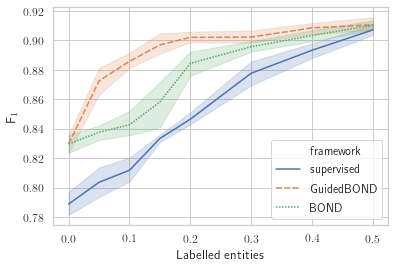

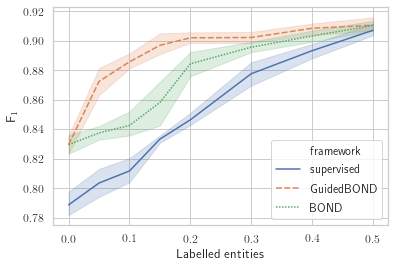

In [38]:
ax = sns.lineplot(data=distant_data, x='added_gold', y='test_f1', hue='framework', style='framework')
ax.set(xlabel='Labelled entities', ylabel='F$_1$')
plt.savefig('experiments/plots/distant_f1.png', dpi=600)

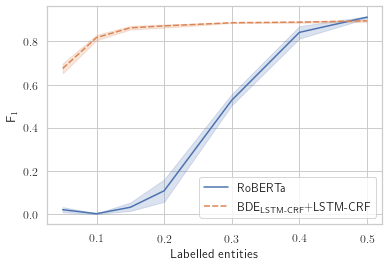

In [42]:
from matplotlib.axes import Axes

ax: Axes = sns.lineplot(data=bert_baseline_comparison, x='added_gold', y='test_f1', hue='BDE', style='BDE')
ax.set(xlabel='Labelled entities', ylabel='F$_1$')
ax.legend(['RoBERTa', 'BDE\\textsubscript{LSTM-CRF}+LSTM-CRF'])
plt.savefig('experiments/plots/bert_baseline_comparison.png', dpi=600)

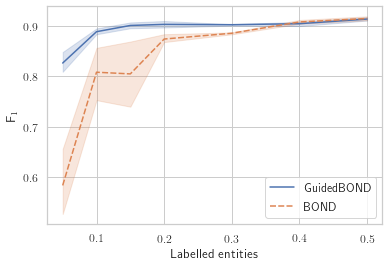

In [43]:
ax = sns.lineplot(data=guidance_comparison, x='added_gold', y='test_f1', hue='framework', style='framework')
ax.set(xlabel='Labelled entities', ylabel='F$_1$')
ax.legend(['GuidedBOND', 'BOND'])
plt.savefig('experiments/plots/guidance_comparison.png', dpi=600)

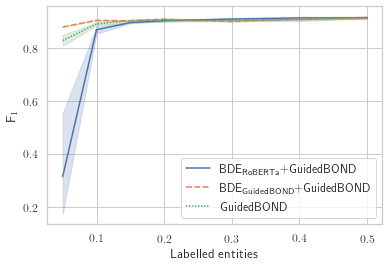

In [44]:
ax = sns.lineplot(data=bde_ablation, x='added_gold', y='test_f1', hue='BDE', style='BDE')
ax.set(xlabel='Labelled entities', ylabel='F$_1$')
ax.legend(['BDE\\textsubscript{RoBERTa}+GuidedBOND', 'BDE\\textsubscript{GuidedBOND}+GuidedBOND', 'GuidedBOND'])
plt.savefig('experiments/plots/bde_ablation.png', dpi=600)

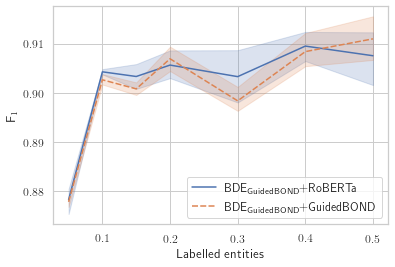

In [46]:
ax = sns.lineplot(data=framework_ablation, x='added_gold', y='test_f1', hue='framework', style='framework')
ax.set(xlabel='Labelled entities', ylabel='F$_1$')
ax.legend(['BDE\\textsubscript{GuidedBOND}+RoBERTa', 'BDE\\textsubscript{GuidedBOND}+GuidedBOND'], loc='lower right')
plt.savefig('experiments/plots/framework_ablation.png', dpi=600)

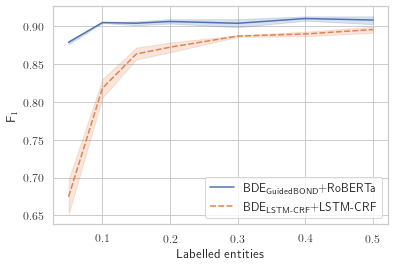

In [47]:
ax = sns.lineplot(data=baseline_comparison, x='added_gold', y='test_f1', hue='BDE', style='BDE')
ax.set(xlabel='Labelled entities', ylabel='F$_1$')
ax.legend(['BDE\\textsubscript{GuidedBOND}+RoBERTa', 'BDE\\textsubscript{LSTM-CRF}+LSTM-CRF'], loc='lower right')
plt.savefig('experiments/plots/baseline_comparison.png', dpi=600)

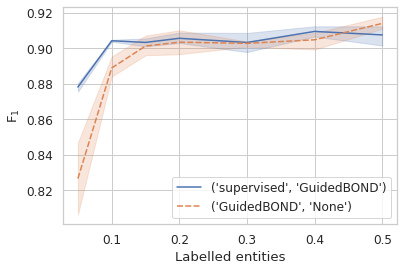

In [66]:
ax = sns.lineplot(data=final_comparison, x='added_gold', y='test_f1', hue=final_comparison[['framework', 'BDE']].apply(tuple, axis=1), style=final_comparison[['framework', 'BDE']].apply(tuple, axis=1))
ax.set(xlabel='Labelled entities', ylabel='F$_1$')
plt.savefig('experiments/plots/normal_f1.png', dpi=600)